In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
base= automap_base()
base.prepare(engine, reflect=True)

In [5]:
# reflect an existing database into a new model

# reflect the tables


In [6]:
base.classes.keys()

['measurement', 'station']

In [6]:
# View all of the classes that automap found


['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [9]:
# Find the most recent date in the data set.


('2017-08-23',)

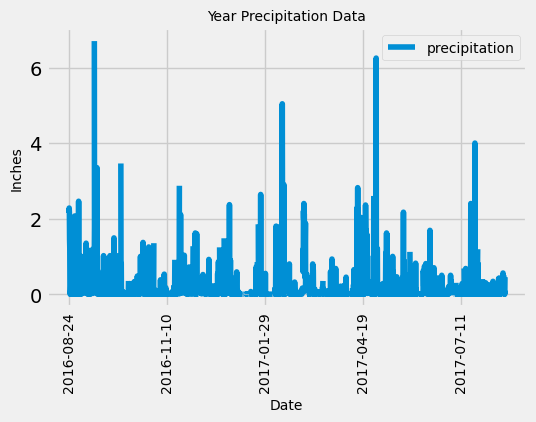

In [12]:
# calculate the date one year from the last date in data set
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
last_yr= dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# perform a query to retrieve the data and precipitation scores
rain_last_yr = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_yr).all()

# save the query results as a Pandas DataFrame
rain_last_yr_df = pd.DataFrame(precipitation_last_year, columns=['date', 'precipitation'])
rain_last_yr_df.set_index('date', inplace=True)

# sort the dataframe by date
prcp_last_year_df = prcp_last_year_df.sort_values(by=['date'])

# use Pandas Plotting with Matplotlib to plot the data
prcp_last_year_df.plot(y='precipitation', use_index=True)
plt.title('Year Precipitation Data', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Inches', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.legend(loc='best', fontsize=10, fancybox=True)
plt.subplots_adjust(left=0.2, bottom=0.3)
plt.savefig("12_Months_Precipitation.png")
plt.show()

Text(0, 0.5, 'Inches')

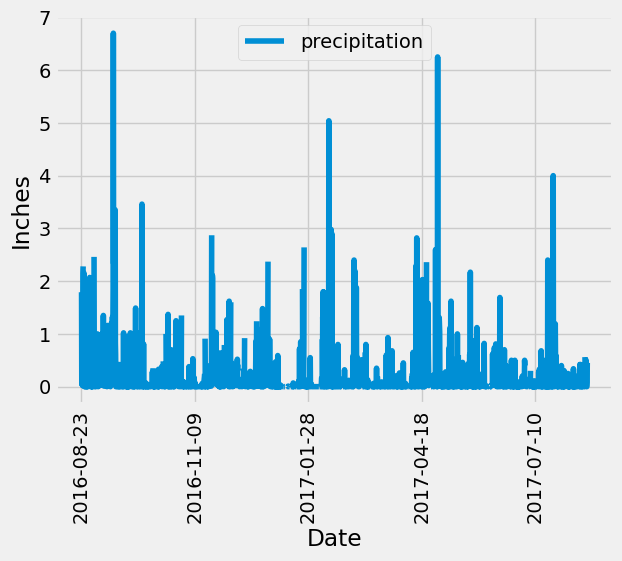

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
rain_last_yr_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
station_query = session.query(func.count(station.name)).all()
station_query

[(9,)]

In [22]:
station_count = session.query(measurement.station, func.count(measurement.id)).\
                filter(measurement.station != ' ').\
                group_by(measurement.station).\
                order_by(func.count(measurement.id).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Replace 'USC00519281' with the most active station ID from the previous query
most_active_station = 'USC00519281'

# Calculate the lowest, highest, and average temperature
result = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
         filter(measurement.station == most_active_station).all()

# Print the result
print(f"Lowest temperature: {result[0][0]}")
print(f"Highest temperature: {result[0][1]}")
print(f"Average temperature: {result[0][2]}")



Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66378066378067


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

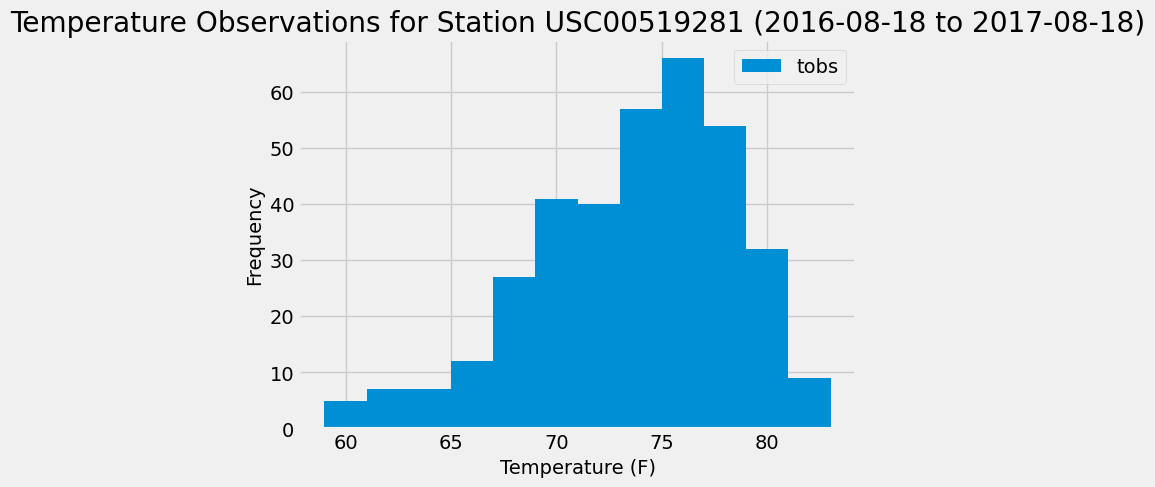

In [24]:
# Replace 'USC00519281' with the most active station ID from the previous query
most_active_station = 'USC00519281'

# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(measurement.date).filter(measurement.station == most_active_station).\
              order_by(measurement.date.desc()).first()[0]
latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d').date()
one_year_ago = latest_date - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for this station
temp_data = session.query(measurement.tobs).filter(measurement.station == most_active_station).\
            filter(measurement.date >= one_year_ago).all()
temp_data = [temp[0] for temp in temp_data]

# Create a histogram of the temperature data
plt.hist(temp_data, bins=12, label='tobs')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station} ({one_year_ago} to {latest_date})')
plt.legend()
plt.show()

Text(0.5, 4.183333333333314, 'Temperature')

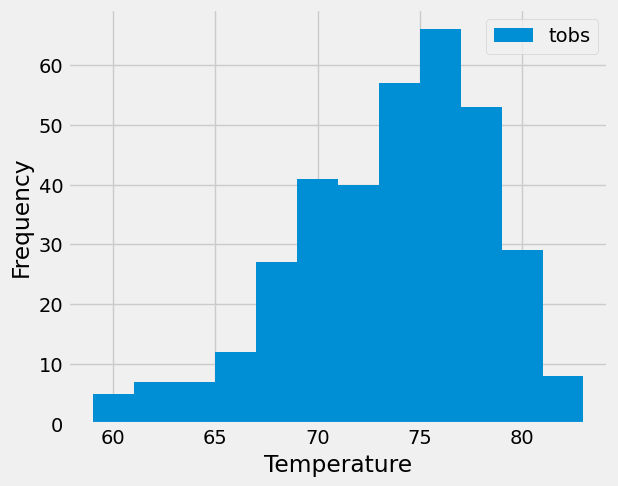

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [25]:
# Close Session
session.close()